In [1]:
import keras
import matplotlib.pyplot as plt
from keras.api import layers
from keras.api.models import Sequential, load_model
from keras.api.utils import to_categorical
from sklearn.metrics import roc_curve, auc
import numpy as np
import pandas as pd
import sys
sys.path.append("F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition")
from Datasets.DataLoader.DataLoader import DataLoader, LABELS


Libraries Loaded Successfully


In [2]:
DATASET1 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-1"
DATASET2 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-2"
DATASET3 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-3"
REAL_DATA = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\Real Data"

IMAGE_SIZE = 64
SHRINK = 10
INPUT_SHAPE = (64, 64)
CLASSES = 43
THRESHOLD = 100

EPOCHS = 20

Loading Files and Dataset ...
Found Categories: ['1-alef', '2-b', '3-p', '4-t', '5-se', '6-jim', '7-che', '8-h', '9-kh', '10-d', '11-zal', '12-r', '13-z', '14-zh', '15-sin', '16-shin', '17-sad', '18-zad', '19-t-long', '20-z-long', '21-ayin', '22-ghyin', '23-f', '24-ghe', '25-k', '26-g', '27-le', '28-m', '29-n', '30-v', '31-he', '32-ye', '33-zero', '34-one', '35-two', '36-three', '37-four', '38-five', '39-six', '40-seven', '41-eight', '42-nine', '43-anewfive'] 

X-Train : (3439, 64, 64)
X-Test : (860, 64, 64)
Y-Train : (3439,)
Y-Test : (860,)


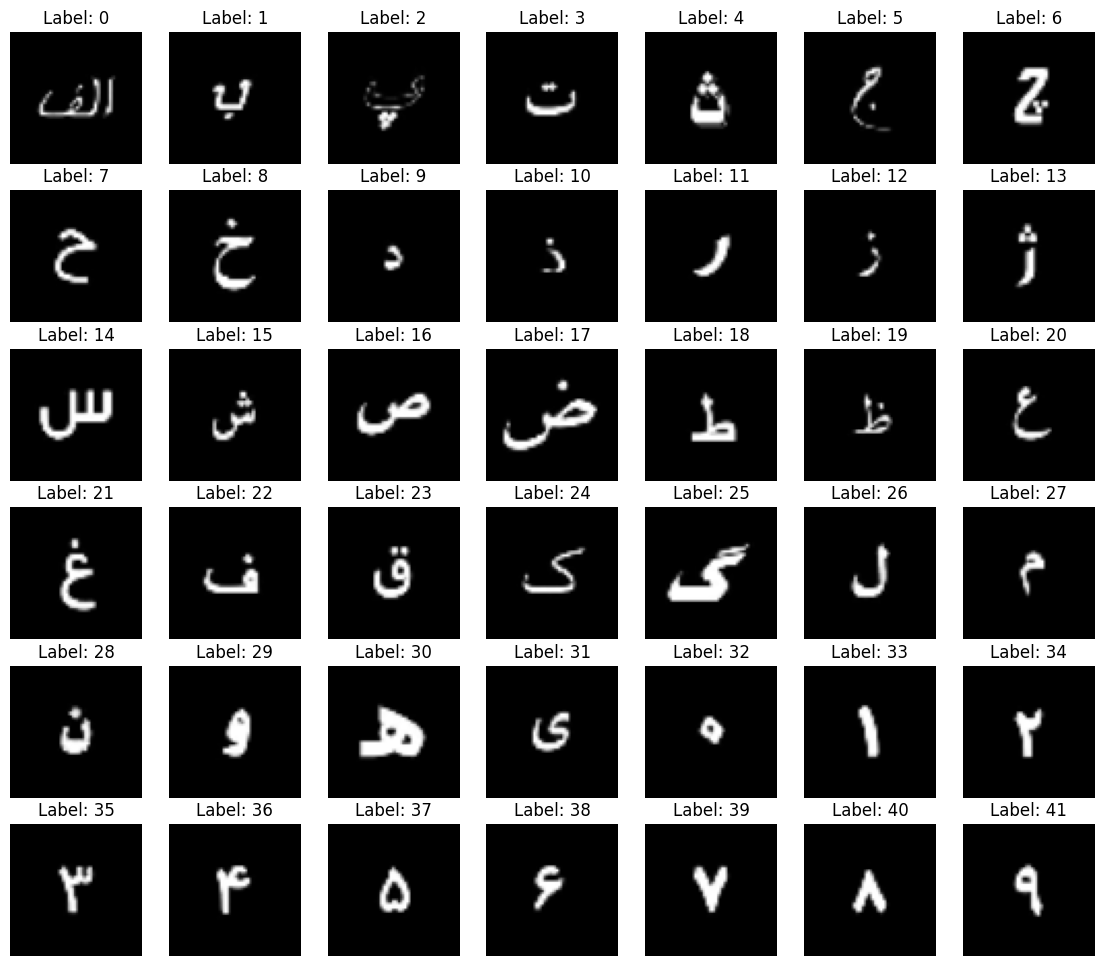

In [3]:
dataloader1 = DataLoader(path=DATASET1, image_size=IMAGE_SIZE, shrink=SHRINK, threshold=None, padding=0, invert=True)
X_train, y_train, X_test, y_test = dataloader1.load_data()


print(f"X-Train : {X_train.shape}")
print(f"X-Test : {X_test.shape}")
print(f"Y-Train : {y_train.shape}")
print(f"Y-Test : {y_test.shape}")

used=[]
counter = 0
i = 0
plt.figure(figsize=(14, 12))
while counter != 42:
    while y_train[i] in used or y_train[i]!=counter:
        i+=1
        continue
    used.append(y_train[i])
    plt.subplot(6, 7, counter + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    counter+=1
plt.show()

In [4]:
model_1 = Sequential(name='Model-1')

model_1.add(layers.Input(shape=INPUT_SHAPE))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(units=2048, activation='relu', use_bias=True, name='Dense_1'))
model_1.add(layers.Dense(units=1024, activation='relu', use_bias=True, name='Dense_2'))
model_1.add(layers.Dense(units=512, activation='relu', use_bias=True, name='Dense_3'))
model_1.add(layers.Dense(units=256, activation='relu', use_bias=True, name='Dense_4'))
model_1.add(layers.Dense(units=64, activation='relu', use_bias=True, name='Dense_5'))
model_1.add(layers.Dense(units=CLASSES, activation='softmax', use_bias=True, name='Dense_6'))

model_1.summary()

Model: "Model-1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 2048)           │     8,390,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_5 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_6 (Dense)                 │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,164,203 (42.59 MB)

 Trainable params: 11,164,203 (42.59 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model_1.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

history = model_1.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_test, y_test))

history_df_1 = pd.DataFrame({
    'Training_Accuracy': history.history['accuracy'],
    'Validation_Accuracy': history.history['val_accuracy'],
    'Training_Loss': history.history['loss'],
    'Validation_Loss': history.history['val_loss']
})

# model_1.save(f"F:/Programming/Python/Machine Learning/Persian-Alphabet-Recognition/Models/Neural Network/{history.history['val_accuracy'][-1]:.4f}_val_acc.keras")

display(history_df_1)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.3521 - loss: 2.4913 - val_accuracy: 0.7767 - val_loss: 0.7584
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8102 - loss: 0.5584 - val_accuracy: 0.8291 - val_loss: 0.5174
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9015 - loss: 0.2949 - val_accuracy: 0.8802 - val_loss: 0.3547
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9070 - loss: 0.2601 - val_accuracy: 0.8942 - val_loss: 0.3531
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9436 - loss: 0.1669 - val_accuracy: 0.8988 - val_loss: 0.3945
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9568 - loss: 0.1367 - val_accuracy: 0.8756 - val_loss: 0.5548
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9516 - loss: 0.1611 - val_accuracy: 0.8779 - val_loss: 0.4953
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9554 - loss: 0.1484 - val_accu

,Training_Accuracy,Validation_Accuracy,Training_Loss,Validation_Loss
0,0.557139,0.776744,1.620262,0.758440
1,0.829311,0.829070,0.504725,0.517433
2,0.897354,0.880233,0.305045,0.354687
3,0.914510,0.894186,0.241295,0.353054
4,0.942716,0.898837,0.180406,0.394522
5,0.953475,0.875581,0.145097,0.554815
6,0.955801,0.877907,0.132888,0.495294
7,0.955801,0.901163,0.143708,0.468074
8,0.961035,0.916279,0.129876,0.411157
9,0.974120,0.905814,0.093158,0.451174


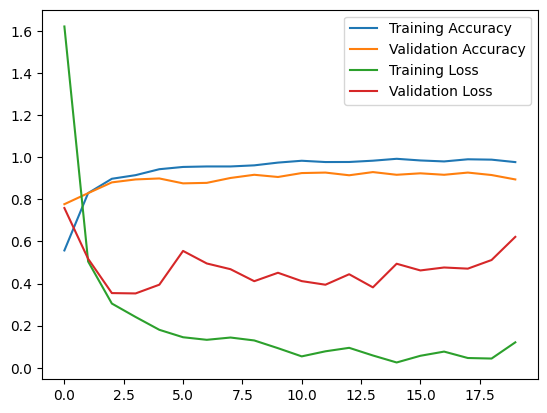

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8889 - loss: 0.5785
Model 1 Test Accuracy: 0.8942
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


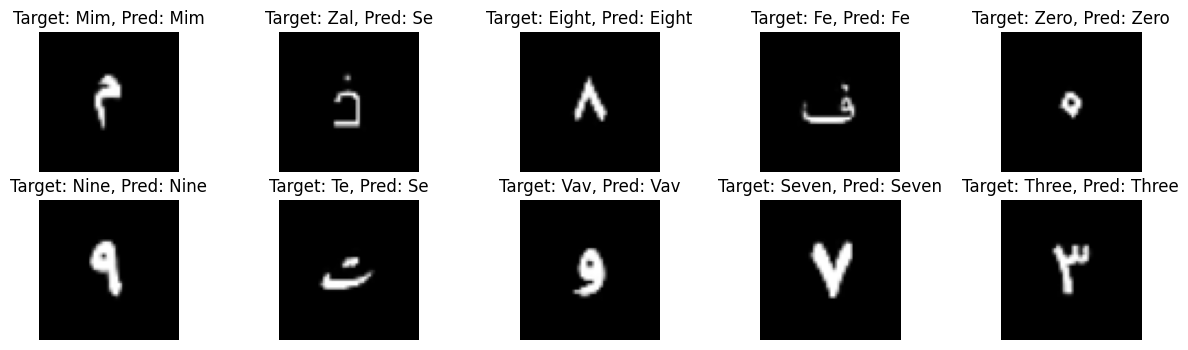

In [6]:
plt.plot(history_df_1['Training_Accuracy'], label='Training Accuracy')
plt.plot(history_df_1['Validation_Accuracy'], label='Validation Accuracy')
plt.plot(history_df_1['Training_Loss'], label='Training Loss')
plt.plot(history_df_1['Validation_Loss'], label='Validation Loss')
plt.legend()
plt.show()


test_loss_1, test_acc_1 = model_1.evaluate(X_test, y_test)
print(f'Model 1 Test Accuracy: {test_acc_1:.4f}')

predictions = model_1.predict(X_test)

used=[]
counter = 0
i = 0
plt.figure(figsize=(15, 4))
while counter != 10:
    while y_test[i] in used:
        i+=1
        continue
    used.append(y_test[i])
    plt.subplot(2, 5, counter + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Target: {LABELS[y_test[i]]}, Pred: {LABELS[np.argmax(predictions[i])]}')
    plt.axis('off')
    counter+=1
plt.show()

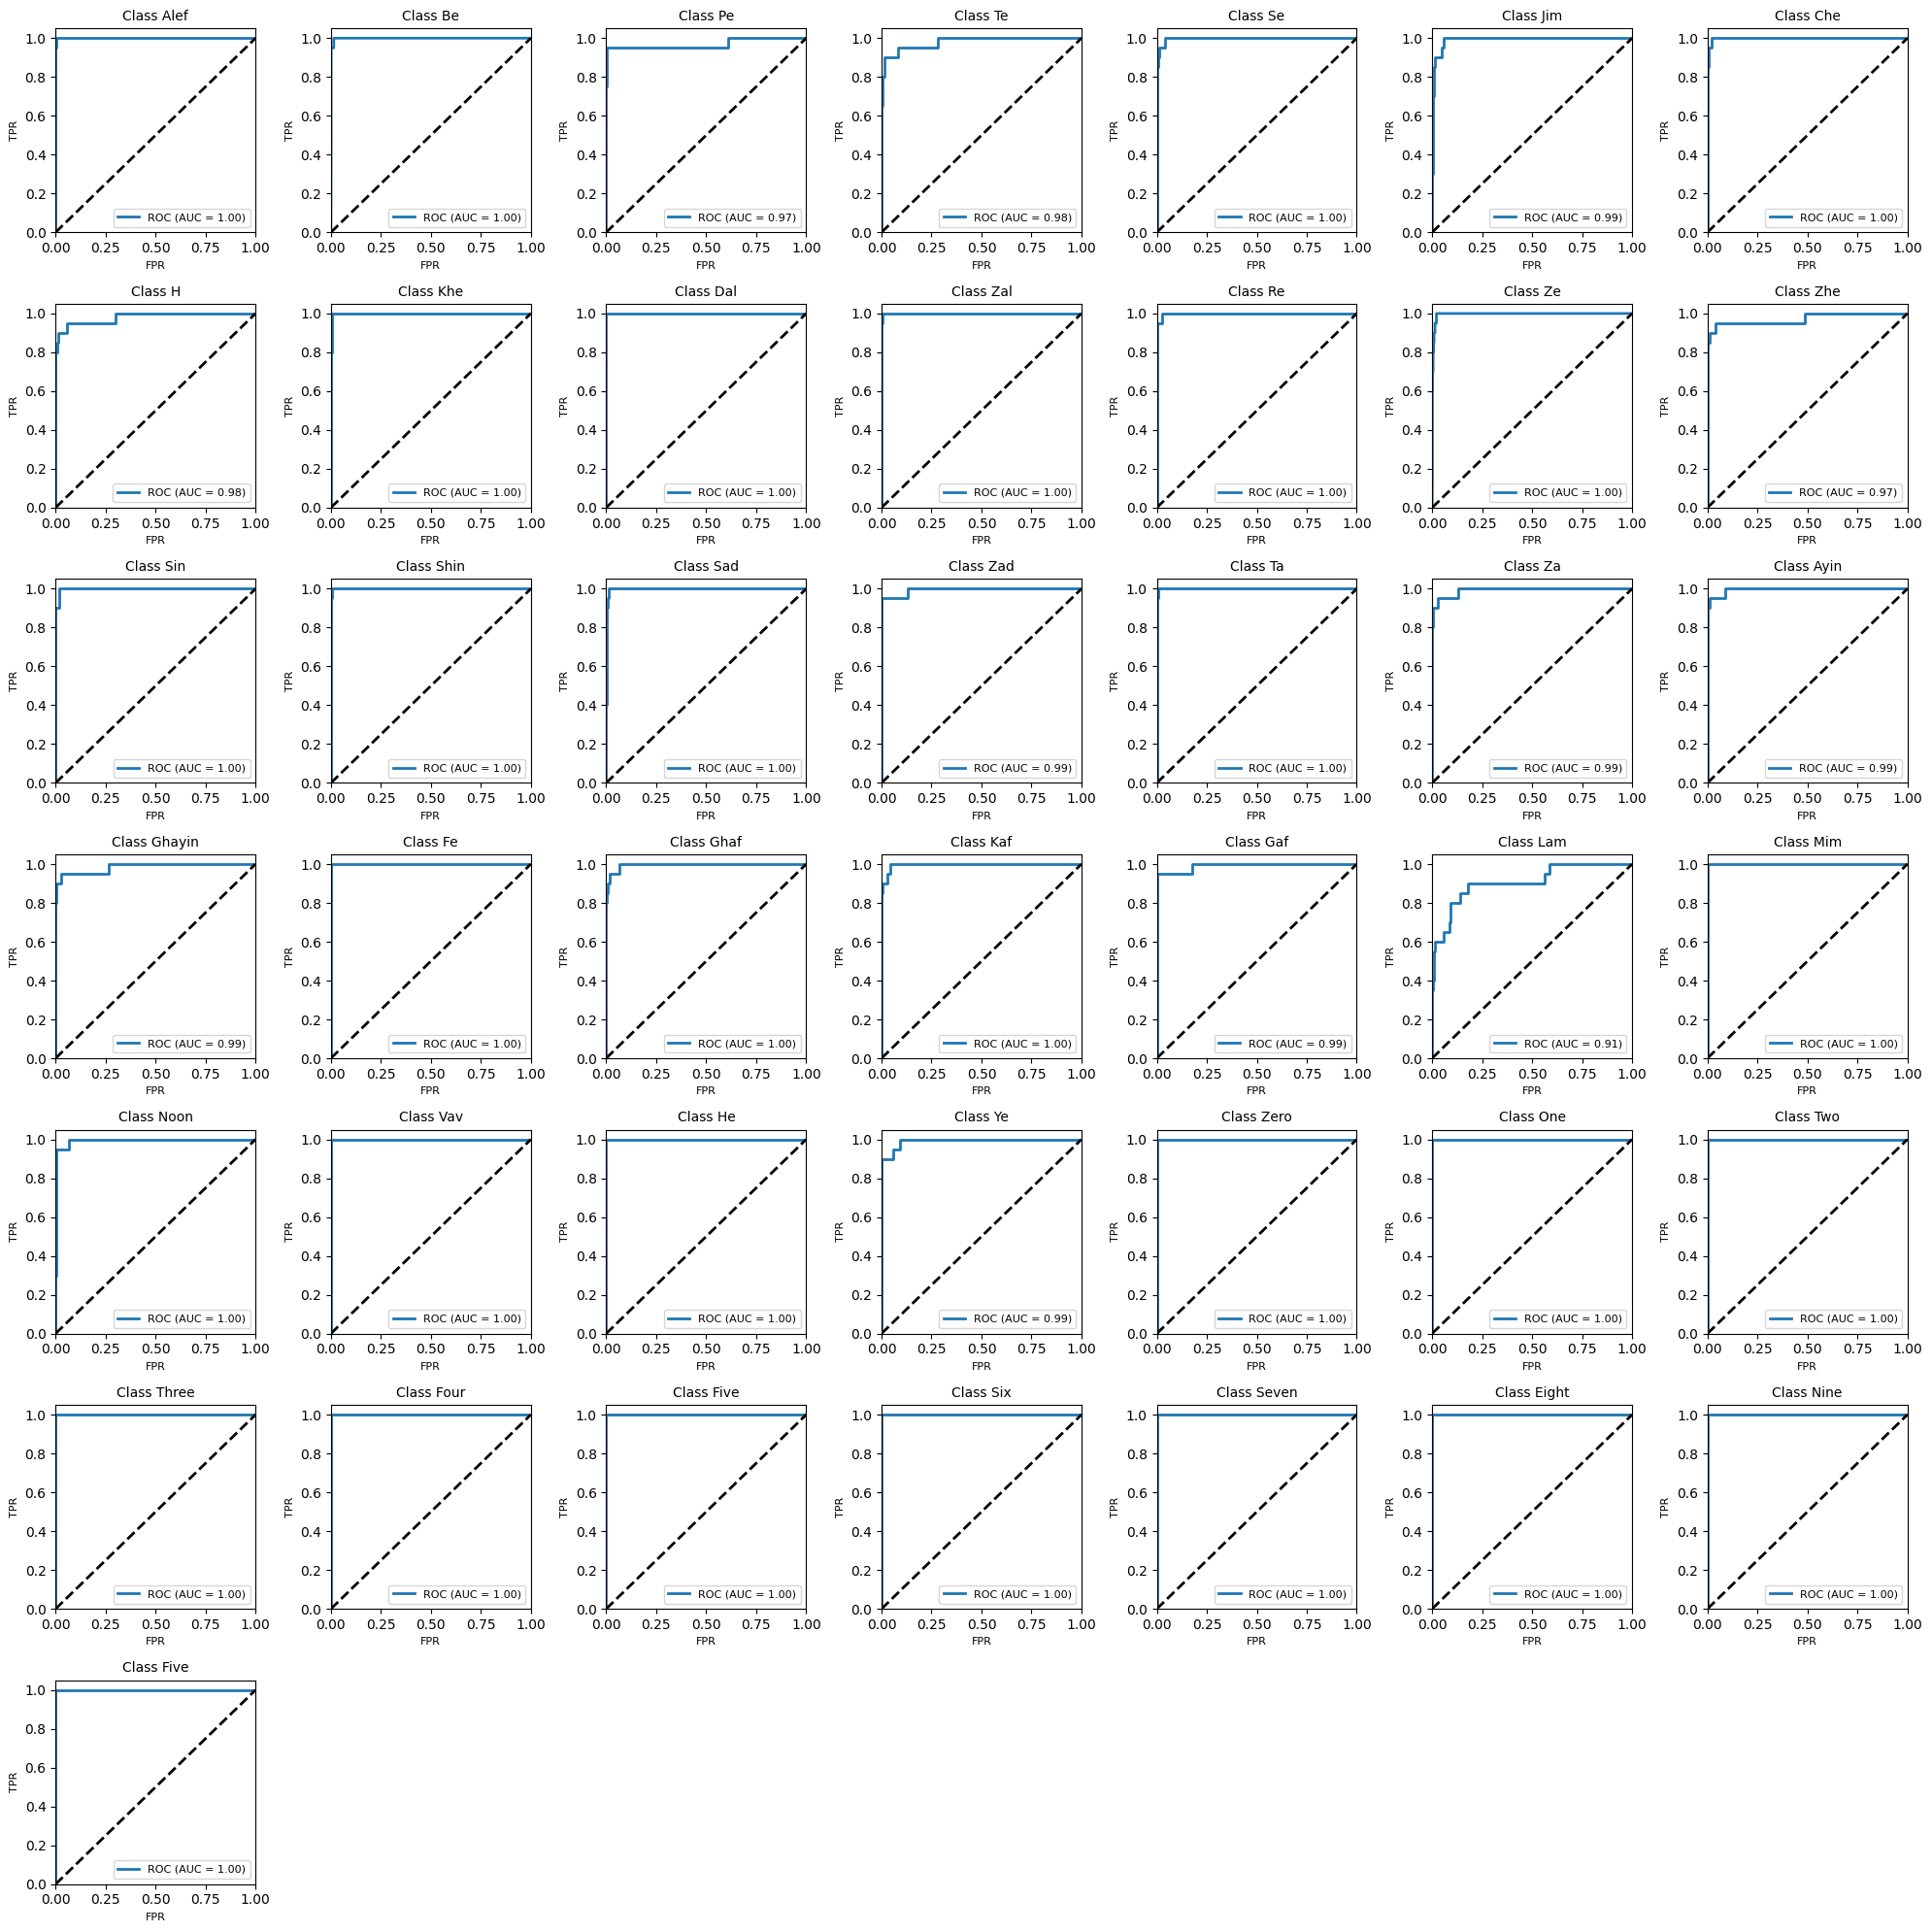

In [7]:
y_test_one_hot = to_categorical(y_test, num_classes=CLASSES)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


n_rows = 7  
n_cols = 7  


fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 20))

axes = axes.flatten()

for i in range(CLASSES):
    ax = axes[i]
    ax.plot(fpr[i], tpr[i], lw=2, label=f'ROC (AUC = {roc_auc[i]:0.2f})')
    ax.plot([0, 1], [0, 1], 'k--', lw=2)

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title(f'Class {LABELS[i]}', fontsize=10)
    ax.legend(loc='lower right', fontsize=8)
    ax.set_xlabel('FPR', fontsize=8)
    ax.set_ylabel('TPR', fontsize=8)

for i in range(CLASSES, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [8]:
model_2 = Sequential(name='Model_2')

model_2.add(layers.Input(shape=(1, INPUT_SHAPE[0], INPUT_SHAPE[1])))


model_2.add(layers.Conv2D(filters=4, kernel_size=7, strides=1, data_format='channels_first', use_bias=True, name='Convolutional_1'))
model_2.add(layers.BatchNormalization(name='Batch_Normalization_1'))
model_2.add(layers.MaxPooling2D(strides=2, data_format='channels_first', name='Max_Pooling_1'))

model_2.add(layers.Dropout(0.25 , name='Drop_out_1'))

model_2.add(layers.Conv2D(filters=8, kernel_size=6, strides=1, data_format='channels_first', use_bias=True, name='Convolutional_2'))
model_2.add(layers.BatchNormalization(name='Batch_Normalization_2'))
model_2.add(layers.MaxPooling2D(strides=2, data_format='channels_first', name='Max_Pooling_2'))

model_2.add(layers.Dropout(0.25 , name='Drop_out_2'))

model_2.add(layers.Flatten(data_format='channels_first', name='Flattening'))

model_2.add(layers.Dense(512, activation='relu', use_bias=True, name='Fully_Connected_1'))
model_2.add(layers.Dense(256, activation='relu', use_bias=True, name='Fully_Connected_2'))
model_2.add(layers.Dense(CLASSES, activation='softmax', use_bias=True, name='Fully_Connected_3'))

model_2.summary()

Model: "Model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Convolutional_1 (Conv2D)        │ (None, 4, 58, 58)      │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Batch_Normalization_1           │ (None, 4, 58, 58)      │           232 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Max_Pooling_1 (MaxPooling2D)    │ (None, 4, 29, 29)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_out_1 (Dropout)            │ (None, 4, 29, 29)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Convolutional_2 (Conv2D)        │ (None, 8, 24, 24)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Batch_Normalization_2           │ (None, 8, 24, 24)      │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Max_Pooling_2 (MaxPooling2D)    │ (None, 8, 12, 12)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_out_2 (Dropout)            │ (None, 8, 12, 12)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flattening (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Fully_Connected_1 (Dense)       │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Fully_Connected_2 (Dense)       │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Fully_Connected_3 (Dense)       │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 734,403 (2.80 MB)

 Trainable params: 734,239 (2.80 MB)

 Non-trainable params: 164 (656.00 B)

In [9]:
model_2.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

history_2 = model_2.fit(X_train.reshape(3439, 1, INPUT_SHAPE[0], INPUT_SHAPE[1]), y_train, epochs=EPOCHS, validation_data=(X_test.reshape(860, 1, INPUT_SHAPE[0], INPUT_SHAPE[1]), y_test))

history_df_2 = pd.DataFrame({
    'Training_Accuracy': history_2.history['accuracy'],
    'Validation_Accuracy': history_2.history['val_accuracy'],
    'Training_Loss': history_2.history['loss'],
    'Validation_Loss': history_2.history['val_loss']
})

# model_1.save(f"F:/Programming/Python/Machine Learning/Persian-Alphabet-Recognition/Models/Neural Network/{history.history['val_accuracy'][-1]:.4f}_val_acc.keras")

display(history_df_2)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 140ms/step - accuracy: 0.3965 - loss: 2.4369 - val_accuracy: 0.7349 - val_loss: 1.8621
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - accuracy: 0.8017 - loss: 0.5492 - val_accuracy: 0.8349 - val_loss: 0.9545
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - accuracy: 0.8807 - loss: 0.3627 - val_accuracy: 0.8674 - val_loss: 0.4861
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - accuracy: 0.8976 - loss: 0.2817 - val_accuracy: 0.8965 - val_loss: 0.3359
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9201 - loss: 0.2114 - val_accuracy: 0.9128 - val_loss: 0.2532
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9436 - loss: 0.1650 - val_accuracy: 0.9209 - val_loss: 0.2483
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 135ms/step - accuracy: 0.9428 - loss: 0.1823 - val_accuracy: 0.9140 - val_loss: 0.2650
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - accuracy: 0.9524 - loss: 0

,Training_Accuracy,Validation_Accuracy,Training_Loss,Validation_Loss
0,0.567607,0.734884,1.593878,1.862089
1,0.817680,0.834884,0.520957,0.954499
2,0.870311,0.867442,0.380953,0.486098
3,0.895318,0.896512,0.288784,0.335919
4,0.917127,0.912791,0.217272,0.253167
5,0.940680,0.920930,0.170287,0.248300
6,0.944170,0.913953,0.167358,0.265019
7,0.954638,0.927907,0.135338,0.244945
8,0.954056,0.927907,0.135663,0.269021
9,0.961908,0.931395,0.123508,0.216472


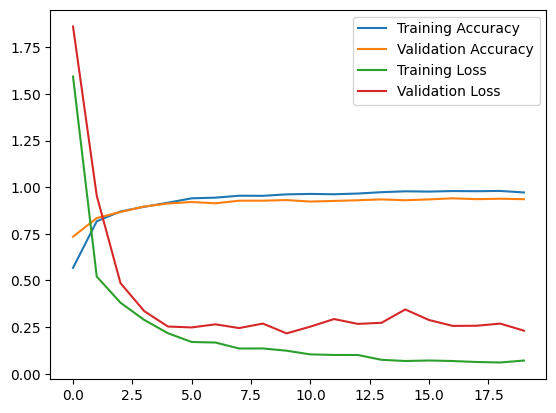

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.9457 - loss: 0.1920
Model 2 Test Accuracy: 0.9360
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step


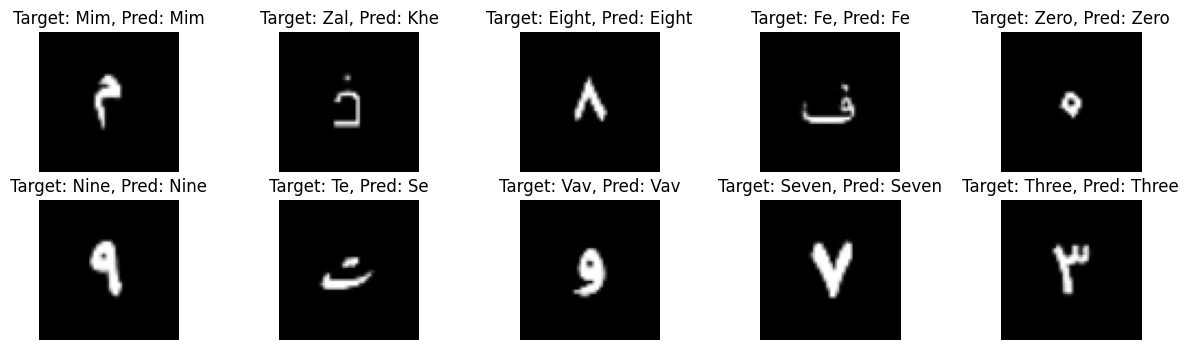

In [10]:
plt.plot(history_df_2['Training_Accuracy'], label='Training Accuracy')
plt.plot(history_df_2['Validation_Accuracy'], label='Validation Accuracy')
plt.plot(history_df_2['Training_Loss'], label='Training Loss')
plt.plot(history_df_2['Validation_Loss'], label='Validation Loss')
plt.legend()
plt.show()

test_loss_2, test_acc_2 = model_2.evaluate(X_test.reshape(860, 1, INPUT_SHAPE[0], INPUT_SHAPE[1]), y_test)
print(f'Model 2 Test Accuracy: {test_acc_2:.4f}')

# loaded_model = load_model(f"F:/Programming/Python/Machine Learning/Persian-Alphabet-Recognition/Models/Neural Network/{test_acc_2:.4f}_val_acc.keras")

predictions_2 = model_2.predict(X_test.reshape(860, 1, INPUT_SHAPE[0], INPUT_SHAPE[1]))

used=[]
counter = 0
i = 0
plt.figure(figsize=(15, 4))
while counter != 10:
    while y_test[i] in used:
        i+=1
        continue
    used.append(y_test[i])
    plt.subplot(2, 5, counter + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Target: {LABELS[y_test[i]]}, Pred: {LABELS[np.argmax(predictions_2[i])]}')
    plt.axis('off')
    counter+=1
plt.show()
plt.show()

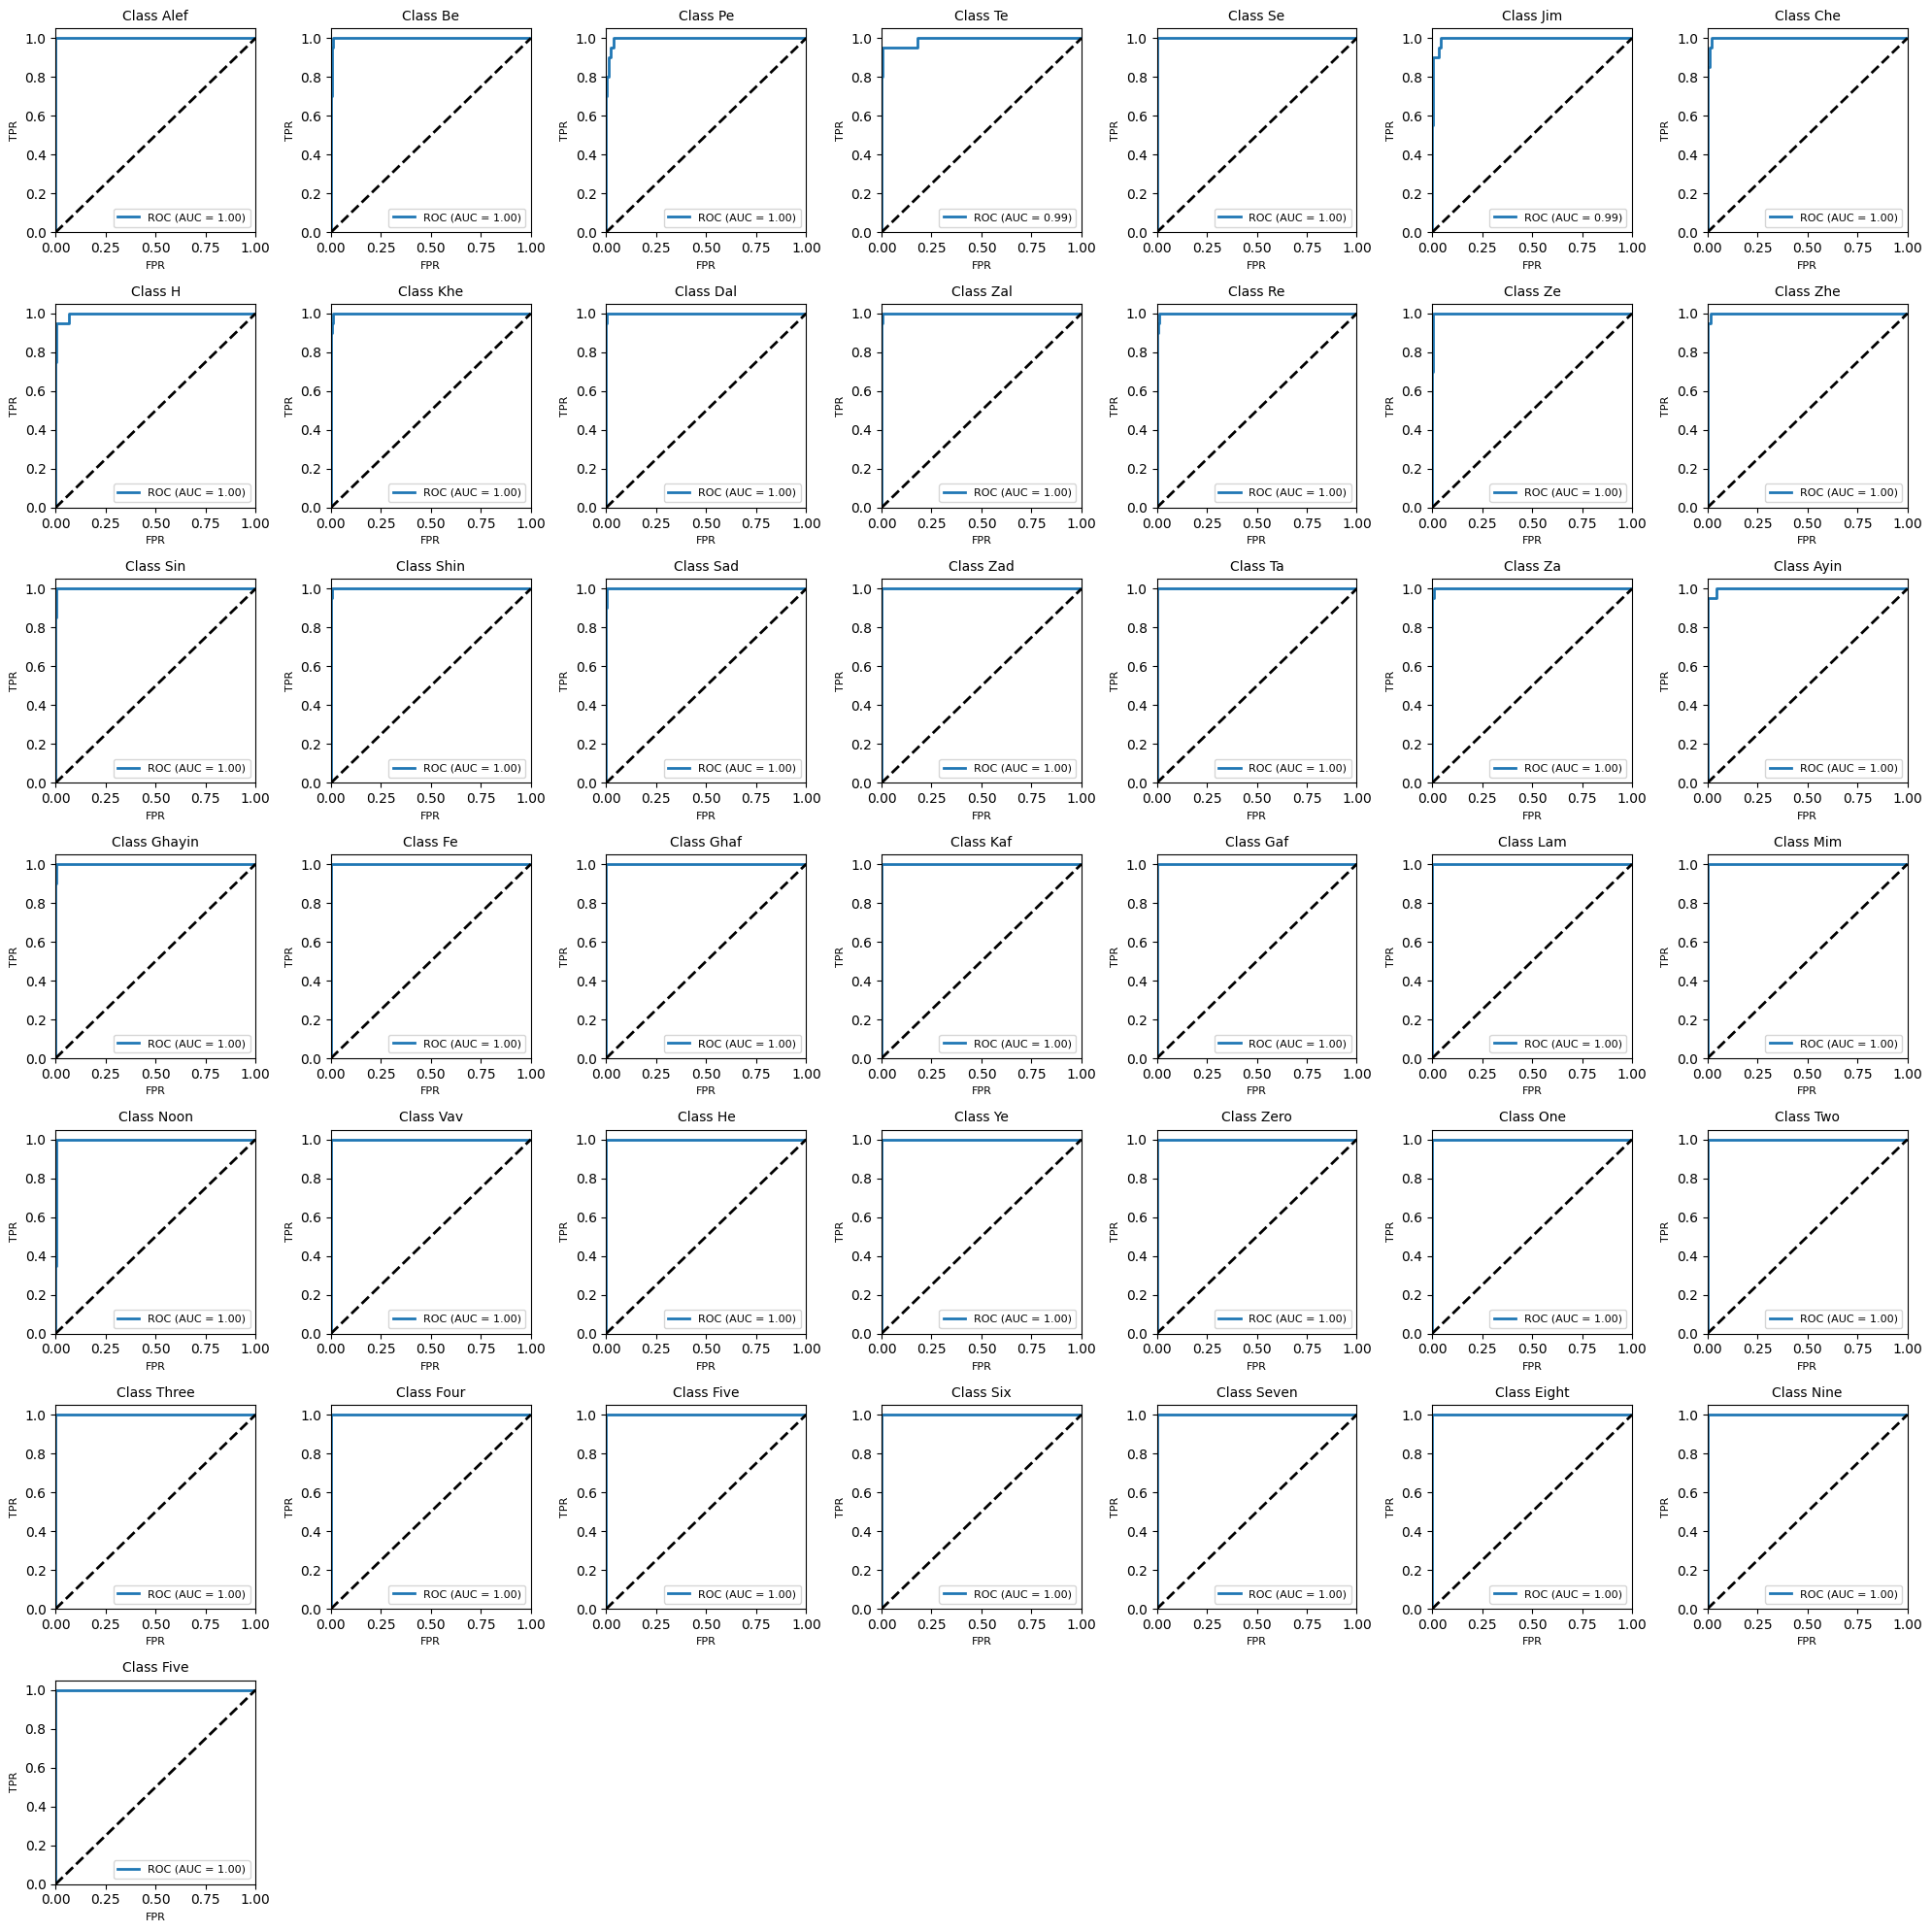

In [11]:
y_test_one_hot = to_categorical(y_test, num_classes=CLASSES)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], predictions_2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


n_rows = 7  
n_cols = 7  


fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 20))

axes = axes.flatten()

for i in range(CLASSES):
    ax = axes[i]
    ax.plot(fpr[i], tpr[i], lw=2, label=f'ROC (AUC = {roc_auc[i]:0.2f})')
    ax.plot([0, 1], [0, 1], 'k--', lw=2)

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title(f'Class {LABELS[i]}', fontsize=10)
    ax.legend(loc='lower right', fontsize=8)
    ax.set_xlabel('FPR', fontsize=8)
    ax.set_ylabel('TPR', fontsize=8)

for i in range(CLASSES, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


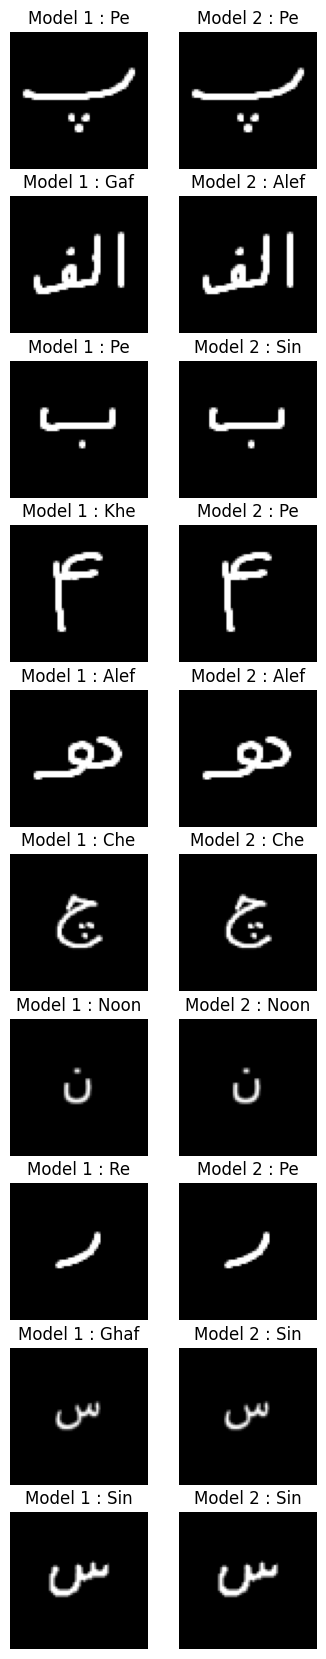

In [46]:
import os
import cv2 as cv

rows = len(os.listdir(REAL_DATA))

plt.figure(figsize=(4, 21))

for i,img_name in enumerate(os.listdir(REAL_DATA)):
    
    image_path = os.path.join(REAL_DATA, img_name)

    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

    image = dataloader1.centerize(image)


    predictions_test_1 = model_1.predict(image.reshape(1,INPUT_SHAPE[0], INPUT_SHAPE[1]))
    predictions_test_2 = model_2.predict(image.reshape(1,1,INPUT_SHAPE[0],INPUT_SHAPE[1]))


    plt.subplot(rows, 2, 2*i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Model 1 : {LABELS[np.argmax(predictions_test_1)]}')
    plt.axis('off')

    plt.subplot(rows, 2, 2*i+2)
    plt.imshow(image, cmap='gray')
    plt.title(f'Model 2 : {LABELS[np.argmax(predictions_test_2)]}')
    plt.axis('off')

plt.show()


Loading Files and Dataset ...
Found Categories: ['1-Alef', '2-Be', '3-Pe', '4-Te', '5-Se', '6-Jim', '7-Che', '8-H', '9-Khe', '10-Dal', '11-Zal', '12-Re', '13-Ze', '14-Zhe', '15-Sin', '16-Shin', '17-Sad', '18-Zad', '19-Ta', '20-Za', '21-Ayin', '22-Ghayin', '23-Fe', '24-Ghaf', '25-Kaf', '26-Gaf', '27-Lam', '28-Mim', '29-Noon', '30-Vav', '31-He', '32-Ye'] 

X-Train : (1484, 64, 64)
X-Test : (372, 64, 64)
Y-Train : (1484,)
Y-Test : (372,)


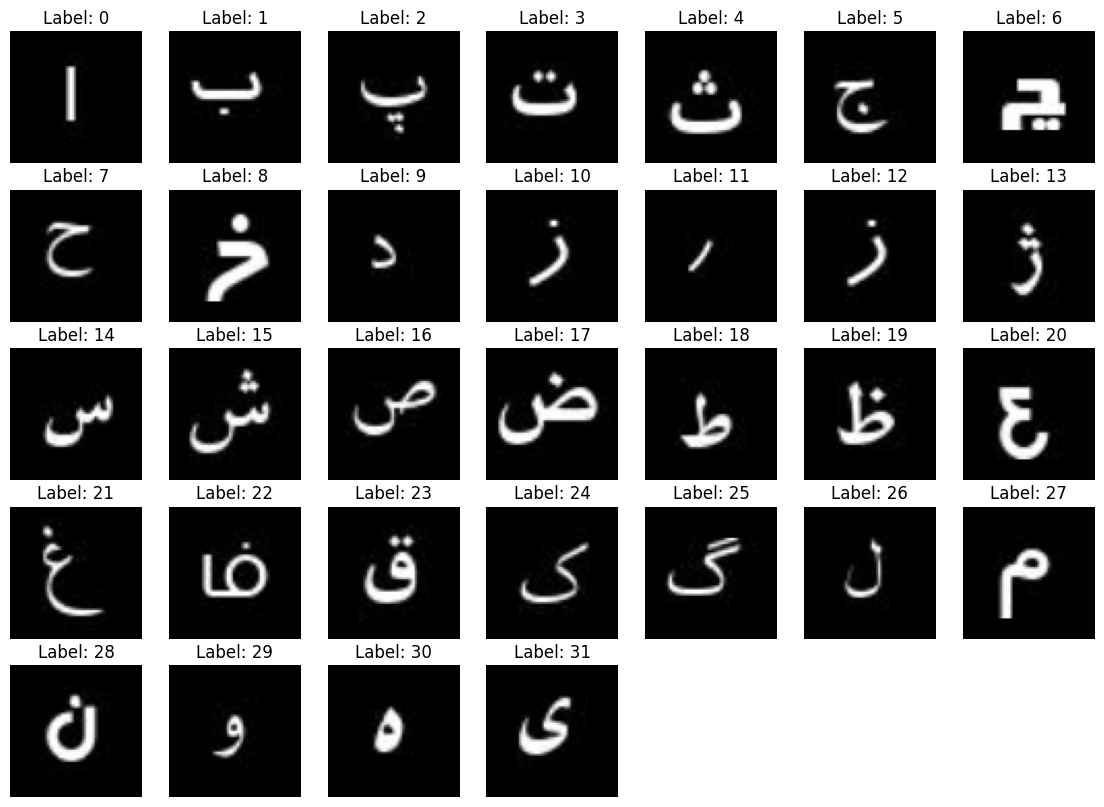

In [16]:
dataloader3 = DataLoader(path=DATASET3, image_size=IMAGE_SIZE, shrink=10, threshold=None, padding=0, invert=False)
X_train, y_train, X_test, y_test = dataloader3.load_data()


print(f"X-Train : {X_train.shape}")
print(f"X-Test : {X_test.shape}")
print(f"Y-Train : {y_train.shape}")
print(f"Y-Test : {y_test.shape}")

used=[]
counter = 0
i = 0
plt.figure(figsize=(14, 12))
while counter != 32:
    while y_train[i] in used or y_train[i]!=counter:
        i+=1
        continue
    used.append(y_train[i])
    plt.subplot(6, 7, counter + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    counter+=1
plt.show()

Loading Files and Dataset ...
Found Categories: ['1-alef', '2-b', '6-jim', '10-d', '12-r', '15-sin', '17-sad', '19-t-long', '21-ayin', '23-f', '24-ghe', '25-k', '27-le', '28-m', '29-n', '30-v', '31-he', '32-ye'] 

X-Train : (460, 64, 64)
X-Test : (116, 64, 64)
Y-Train : (460,)
Y-Test : (116,)


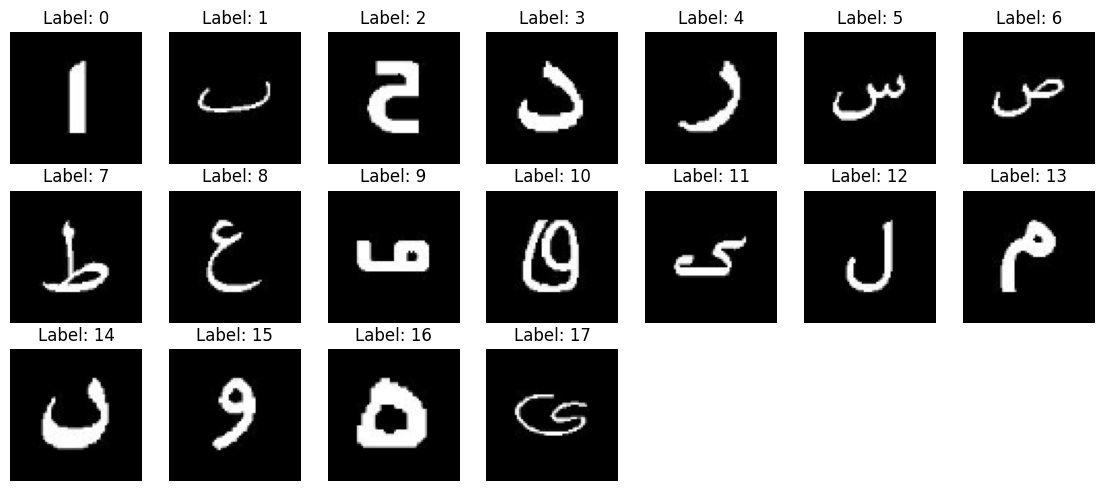

In [47]:
dataloader2 = DataLoader(path=DATASET2, image_size=IMAGE_SIZE, shrink=0, threshold=None, padding=20, invert=False)
X_train, y_train, X_test, y_test = dataloader2.load_data()


print(f"X-Train : {X_train.shape}")
print(f"X-Test : {X_test.shape}")
print(f"Y-Train : {y_train.shape}")
print(f"Y-Test : {y_test.shape}")

used=[]
counter = 0
i = 0
plt.figure(figsize=(14, 12))
while counter != 18:
    while y_train[i] in used or y_train[i]!=counter:
        i+=1
        continue
    used.append(y_train[i])
    plt.subplot(6, 7, counter + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    counter+=1
plt.show()